### Objective of this case study:

- To understand the customers' payment behaviour & patterns
- Predict the likelihood of delay in payments
- Gain business insights

In [3]:
# Importing libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Data review & cleanup: Received payments data

In [5]:
#Reading the csv
received_payments_data = pd.read_csv("Received_Payments_Data.csv")
received_payments_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [6]:
#Reviewing the columns & data types
received_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

##### Note: 
- There are 93937 entries & 'RECEIPT_DOC_NO' seems to have a few missing values.
- The data type for date columns is 'object', therefore, it is required to be converted.

In [8]:
#Checking for weightage of missing values 
round(received_payments_data.isna().sum()/received_payments_data.RECEIPT_METHOD.count(),4)*100

RECEIPT_METHOD           0.00
CUSTOMER_NAME            0.00
CUSTOMER_NUMBER          0.00
RECEIPT_DOC_NO           0.03
RECEIPT_DATE             0.00
CLASS                    0.00
CURRENCY_CODE            0.00
Local Amount             0.00
USD Amount               0.00
INVOICE_ALLOCATED        0.00
INVOICE_CREATION_DATE    0.00
DUE_DATE                 0.00
PAYMENT_TERM             0.00
INVOICE_CLASS            0.00
INVOICE_CURRENCY_CODE    0.00
INVOICE_TYPE             0.00
dtype: float64

##### Note: 
- The % of missing values is 0.03% which is negligible.
- Also, 'RECEIPT_DOC_NO', 'CUSTOMER_NUMBER' & 'Local Amount' (standard alternative is 'USD Amount') columns can be removed from the table    

In [10]:
#Changing the data types for the date columns
received_payments_data['RECEIPT_DATE'] = pd.to_datetime(received_payments_data['RECEIPT_DATE'])
received_payments_data['INVOICE_CREATION_DATE'] = pd.to_datetime(received_payments_data['INVOICE_CREATION_DATE'])
received_payments_data['DUE_DATE'] = pd.to_datetime(received_payments_data['DUE_DATE'])

In [11]:
#Removing the columns that are not needed for this study
received_payments_data.drop(['RECEIPT_DOC_NO','CUSTOMER_NUMBER','Local Amount'], axis=1, inplace=True)

In [12]:
#Checking the changes made
received_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   RECEIPT_DATE           93937 non-null  datetime64[ns]
 3   CLASS                  93937 non-null  object        
 4   CURRENCY_CODE          93937 non-null  object        
 5   USD Amount             93937 non-null  float64       
 6   INVOICE_ALLOCATED      93937 non-null  object        
 7   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 8   DUE_DATE               93937 non-null  datetime64[ns]
 9   PAYMENT_TERM           93937 non-null  object        
 10  INVOICE_CLASS          93937 non-null  object        
 11  INVOICE_CURRENCY_CODE  93937 non-null  object        
 12  INVOICE_TYPE           93937 non-null  object        
dtypes

In [13]:
#Checking for the number of unique values within the columns
received_payments_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [14]:
received_payments_data[received_payments_data['USD Amount']==0].shape

(1126, 13)

##### Note: 
- 'CLASS' column has only one attribute 'PMT'. Not being useful to our study, the column can be dropped
- USD Amount = 0 for entries can be removed because there will be no payments made for the same

In [16]:
#Removing the columns that are not needed for this study
received_payments_data.drop(['CLASS'], axis=1, inplace=True)

In [17]:
#Removing the entries with USD Amount = 0
received_payments_data=received_payments_data[received_payments_data['USD Amount']>0]

In [18]:
#Checking the changes made
received_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92811 entries, 0 to 93936
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         92811 non-null  object        
 1   CUSTOMER_NAME          92811 non-null  object        
 2   RECEIPT_DATE           92811 non-null  datetime64[ns]
 3   CURRENCY_CODE          92811 non-null  object        
 4   USD Amount             92811 non-null  float64       
 5   INVOICE_ALLOCATED      92811 non-null  object        
 6   INVOICE_CREATION_DATE  92811 non-null  datetime64[ns]
 7   DUE_DATE               92811 non-null  datetime64[ns]
 8   PAYMENT_TERM           92811 non-null  object        
 9   INVOICE_CLASS          92811 non-null  object        
 10  INVOICE_CURRENCY_CODE  92811 non-null  object        
 11  INVOICE_TYPE           92811 non-null  object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 9.2+ MB

In [19]:
#Resetting index
received_payments_data=received_payments_data.reset_index()

In [20]:
#Checking the changes made
received_payments_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92811 entries, 0 to 92810
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  92811 non-null  int64         
 1   RECEIPT_METHOD         92811 non-null  object        
 2   CUSTOMER_NAME          92811 non-null  object        
 3   RECEIPT_DATE           92811 non-null  datetime64[ns]
 4   CURRENCY_CODE          92811 non-null  object        
 5   USD Amount             92811 non-null  float64       
 6   INVOICE_ALLOCATED      92811 non-null  object        
 7   INVOICE_CREATION_DATE  92811 non-null  datetime64[ns]
 8   DUE_DATE               92811 non-null  datetime64[ns]
 9   PAYMENT_TERM           92811 non-null  object        
 10  INVOICE_CLASS          92811 non-null  object        
 11  INVOICE_CURRENCY_CODE  92811 non-null  object        
 12  INVOICE_TYPE           92811 non-null  object        
dtypes

### Data analysis

##### Note: Now that we have cleaned the data, it is important to analyse a few parameters that are important for this study

In [23]:
#Checking the spread of the data 
received_payments_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

In [24]:
#Checking the spread of the data 
received_payments_data['CUSTOMER_NAME'].value_counts()

CUSTOMER_NAME
SEPH Corp    23075
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
MHM  Corp        1
HAJR Corp        1
RASH Corp        1
AHL  Corp        1
JOMA Corp        1
Name: count, Length: 689, dtype: int64

In [25]:
#Checking the spread of the data 
received_payments_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
AED    36027
SAR    35784
USD    19361
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

In [26]:
#Checking the spread of the data 
received_payments_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    87313
CM      4946
DM       552
Name: count, dtype: int64

In [27]:
#Checking the spread of the data 
received_payments_data['INVOICE_CURRENCY_CODE'].value_counts()

INVOICE_CURRENCY_CODE
SAR    38491
AED    32119
USD    18389
EUR     1518
KWD     1088
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: count, dtype: int64

In [28]:
#Checking the spread of the data 
received_payments_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66569
Non Goods    26242
Name: count, dtype: int64

In [29]:
#Checking the spread of the data 
received_payments_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

##### Note:
- Wire transfer is the most utilised receipt method
- AED, SAR & USD are the most utilised currencies
- The major class of the invoice type has been for Goods
- And there have been a few credit notes & debit notes

Now, we need to move onto the the creation of the target variable i.e. 'defaulted' for the cases where the receipt date greater than the due date 

In [31]:
#Creating the target column 'defaulted'
received_payments_data['defaulted'] = (received_payments_data["RECEIPT_DATE"] > received_payments_data["DUE_DATE"]).astype(int)

In [32]:
#Count of defaulted bill payments
received_payments_data.defaulted.value_counts()

defaulted
1    60933
0    31878
Name: count, dtype: int64

In [33]:
#% of defaulted bill payments
received_payments_data.defaulted.value_counts(normalize=True)

defaulted
1    0.656528
0    0.343472
Name: proportion, dtype: float64

##### Note: 66% defaults/delay in invoices is not good for the organisation

In [35]:
#Extracting months from the date columns
received_payments_data['reciept_month'] = received_payments_data['RECEIPT_DATE'].dt.month
received_payments_data['invoice_creation_month'] = received_payments_data['INVOICE_CREATION_DATE'].dt.month
received_payments_data['due_month'] = received_payments_data['DUE_DATE'].dt.month

In [36]:
#Month-wise due invoices
orders_due_by_month = received_payments_data.groupby('due_month').count()['DUE_DATE']
orders_due_by_month

due_month
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [37]:
#Paid on time & delayed USD amounts
usd_amt_delayed = received_payments_data.pivot_table(values='USD Amount', index='defaulted', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_delayed.round()

,defaulted,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575248.0,224785.0,879206.0
1,1,517974.0,165499.0,991505.0


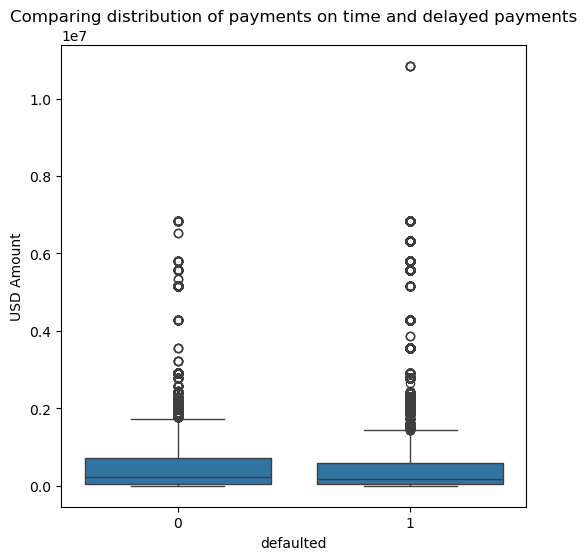

In [38]:
#Visualising the data
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='defaulted', data = received_payments_data)
plt.title("Comparing distribution of payments on time and delayed payments")

plt.show()

In [39]:
#Finding customers with more than 500 orders
total_orders_by_customers = received_payments_data.groupby('CUSTOMER_NAME').count()['defaulted'].sort_values(ascending=False).reset_index()
customers_with_500 = total_orders_by_customers[total_orders_by_customers['defaulted'] > 500]['CUSTOMER_NAME']
customers_with_500

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

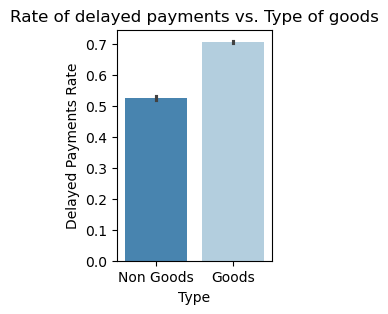

In [40]:
#Visualising the rate of delayed payments by Invoice Type
plt.figure(figsize=(2,3))
sns.barplot(data=received_payments_data, x='INVOICE_TYPE', y='defaulted', estimator=np.mean, palette='Blues_r')
plt.title("Rate of delayed payments vs. Type of goods")
plt.xlabel("Type")
plt.ylabel("Delayed Payments Rate")
plt.show()

In [41]:
#Get cummulative sum on value_counts()
payment_term_sum = received_payments_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
payment_term_sum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [42]:
#Merging the duplicate columns
received_payments_data['PAYMENT_TERM'] = received_payments_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')
received_payments_data['PAYMENT_TERM'] = received_payments_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

In [43]:
#With changes
payment_term_sum = received_payments_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
payment_term_sum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

In [44]:
#Taking top 11 attributes that account for 97% of the data
top_attributes = payment_term_sum.index[:11]

#Moving the rest values to Others
received_payments_data['PAYMENT_TERM'] = received_payments_data['PAYMENT_TERM'].apply(lambda x : x if x in top_attributes else 'Others')

received_payments_data['PAYMENT_TERM'].value_counts()

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
45 Days from Inv Date     3550
Others                    2564
90 Days from Inv Date     2211
100% Adv Payment          1238
Name: count, dtype: int64

In [45]:
#Dummy variables for the 'PAYMENT_TERM' & 'INVOICE_CLASS' columns
payment_term_dummy= pd.get_dummies(received_payments_data['PAYMENT_TERM']).drop('Others', axis=1)
received_payments_data = received_payments_data.join(payment_term_dummy).drop('PAYMENT_TERM', axis=1)

invoice_class_dummy= pd.get_dummies(received_payments_data['INVOICE_CLASS'])
received_payments_data = received_payments_data.join(invoice_class_dummy).drop('INVOICE_CLASS', axis=1)

received_payments_data.columns

Index(['index', 'RECEIPT_METHOD', 'CUSTOMER_NAME', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'defaulted', 'reciept_month', 'invoice_creation_month',
       'due_month', '100% Adv Payment', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

### Working on the 'Open Invoice' dataset

In [47]:
# Reading the open invoice dataset
open_invoice_data = pd.read_csv("Open_Invoice_data.csv",encoding='latin1')
open_invoice_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [48]:
#Carrying out the data cleanup & formatting as done for the training dataset
#Dropping the insignificant columns
open_invoice_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency',
                        'Transaction Number','Customer Account No','Local Amount'], axis= 1, inplace= True)

In [49]:
#Running the datatype check
open_invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [50]:
#Viewing the datatypes
open_invoice_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [51]:
#Correcting the data formats
open_invoice_data['Due Date'] = pd.to_datetime(open_invoice_data['Due Date'])
open_invoice_data['INV_CREATION_DATE'] = pd.to_datetime(open_invoice_data['INV_CREATION_DATE'])

open_invoice_data['USD Amount'] = open_invoice_data['USD Amount'].apply(lambda x: x.replace(",", ""))
open_invoice_data['USD Amount'] = open_invoice_data['USD Amount'].astype(int)

In [52]:
#Removing the negative & 0 values
open_invoice_data = open_invoice_data[open_invoice_data['USD Amount']>0]

In [53]:
#Re-checking
open_invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int64         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 4.9+ MB


In [54]:
#Feature engineering as done for 'Payments Term' & 'Invoice Class' columns above
open_invoice_data['Payment Term'] = open_invoice_data['Payment Term'].apply(lambda x: x if x in top_attributes else 'Others')
open_invoice_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
30 Days from EOM          5324
Others                    4068
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
100% Adv Payment          1317
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [55]:
#Creating dummy variables
payment_term_dummy_for_oi = pd.get_dummies(open_invoice_data['Payment Term']).drop('Others', axis=1)

#Merging the data and removing the 'Payment Term' column
open_invoice_data = open_invoice_data.join(payment_term_dummy_for_oi).drop('Payment Term', axis=1)
open_invoice_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,100% Adv Payment,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,False,False,False,True,False,False,False,False,False,False,False
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,False,False,False,True,False,False,False,False,False,False,False
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False,False
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,False,False,True,False,False,False,False,False,False,False,False
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,False,False,True,False,False,False,False,False,False,False,False


In [56]:
#Workin on the transaction class 
open_invoice_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [57]:
#Standardising the column
open_invoice_data['Transaction Class'] = open_invoice_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [58]:
#Creating dummy variables
transaction_class_dummy = pd.get_dummies(open_invoice_data['Transaction Class'])

#Adding the dummy variables to main dataset and dropping the Transaction Class column
open_invoice_data = open_invoice_data.join(transaction_class_dummy).drop('Transaction Class', axis=1)

#'CM' variable needed in open_invoice_data
open_invoice_data['CM'] = 0

### Working on customer segmentations

In [60]:
#Number of days spent to make the payment after invoice creation
received_payments_data['num_days_spent'] = (received_payments_data['RECEIPT_DATE']-received_payments_data['INVOICE_CREATION_DATE']).dt.days

In [61]:
#Customer wise average days for payment
customer_segment_1 = received_payments_data.groupby('CUSTOMER_NAME')['num_days_spent'].mean()
customer_segment_1 = customer_segment_1.to_frame()
customer_segment_1.reset_index
customer_segment_1.rename(columns={'num_days_spent': 'avgnum_days_spent'}, inplace=True)
customer_segment_1.head()

,avgnum_days_spent
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [62]:
#Customer wise standard deviation in days for payment
customer_segment_2 = received_payments_data.groupby('CUSTOMER_NAME')['num_days_spent'].std()
customer_segment_2 = customer_segment_2.to_frame()
customer_segment_2.reset_index
customer_segment_2.rename(columns={'num_days_spent': 'stdnum_days_spent'}, inplace=True)
customer_segment_2.head()

,stdnum_days_spent
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [63]:
#Merging the dataframes
customer_segment_merged = pd.merge(customer_segment_1, customer_segment_2, how='inner', on='CUSTOMER_NAME')

customer_segment_merged.head()

,avgnum_days_spent,stdnum_days_spent
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


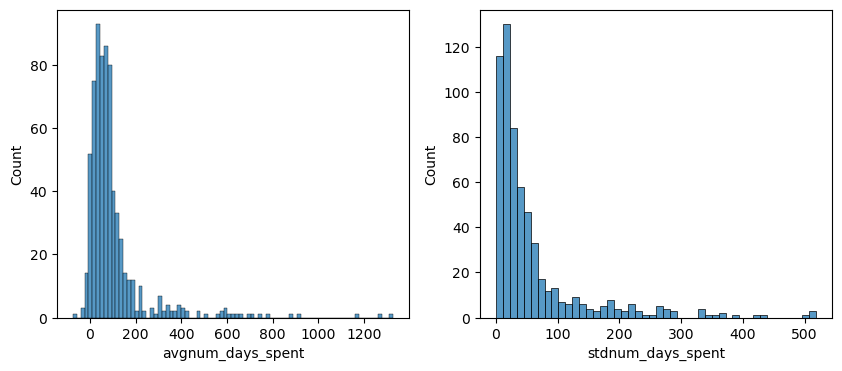

In [64]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(customer_segment_merged['avgnum_days_spent'])

plt.subplot(1,2,2)
sns.histplot(customer_segment_merged['stdnum_days_spent'])

plt.show()

##### Note: Data is not normalised

In [66]:
#Resetting the index
customer_segment_merged.reset_index(inplace=True)

#Checking for null values
round(customer_segment_merged.isna().sum())

CUSTOMER_NAME         0
avgnum_days_spent     0
stdnum_days_spent    86
dtype: int64

In [67]:
#Null values to be replaced with 0 for missing cases
customer_segment_merged['stdnum_days_spent'].fillna(0,inplace=True)

In [68]:
#Creating a dataframe for clustering
clustering_dataset = customer_segment_merged.copy()

#Dropping CUSTOMER_NAME for clustering
clustering_dataset.drop('CUSTOMER_NAME',axis=1,inplace=True)
clustering_dataset.head()

,avgnum_days_spent,stdnum_days_spent
0,24.395349,13.040449
1,40.666667,7.952987
2,45.400000,52.581366
3,16.000000,0.000000
4,76.906250,54.919326


### Clustering

In [70]:
#Importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [71]:
#K-means
k_means = KMeans(n_clusters=4, max_iter=50, random_state=45)
k_means.fit(clustering_dataset)
k_means.cluster_centers_

array([[ 50.42721422,  22.91009706],
       [148.43521831, 107.97189172],
       [394.08486822, 246.15996702],
       [868.4195122 , 103.17807528]])

In [72]:
#Silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    k_means = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    k_means.fit(clustering_dataset)
    
    cluster_labels = k_means.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(clustering_dataset, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7861383479889147
For n_clusters=3, the silhouette score is 0.7091967747310427
For n_clusters=4, the silhouette score is 0.556731529161868
For n_clusters=5, the silhouette score is 0.4106445217495286
For n_clusters=6, the silhouette score is 0.42403857283187885
For n_clusters=7, the silhouette score is 0.43098889273538715
For n_clusters=8, the silhouette score is 0.43470676169420264


##### Note: The oplimal number of clusters is = 3

In [74]:
#Final model with n_clusters=3
k_means = KMeans(n_clusters=3, max_iter=50, random_state=42)
k_means.fit(clustering_dataset)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [76]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [78]:
#Assigning labels to the customer_segment_merged dataframe
customer_segment_merged['cluster_id'] = k_means.labels_
customer_segment_merged.head()

,CUSTOMER_NAME,avgnum_days_spent,stdnum_days_spent,cluster_id
0,3D D Corp,24.395349,13.040449,1
1,6TH Corp,40.666667,7.952987,1
2,A3 D Corp,45.400000,52.581366,1
3,ABC Corp,16.000000,0.000000,1
4,ABDU Corp,76.906250,54.919326,1
